# Estandarización, covarianza y correlación

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline


In [10]:
df = pd.read_csv('iris-data.csv', index_col = 0)
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [11]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

## Visualización general

In [12]:
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

In [16]:
media = np.mean(y)
desv_std = np.std(y)
media, desv_std

(3.7580000000000005, 1.759404065775303)

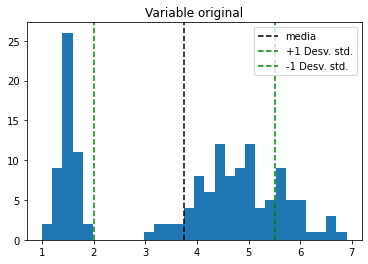

In [18]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins=30)
ax.axvline(x=media, c='k', label='media', linestyle='--')
ax.axvline(x=media+desv_std, c='g', label='+1 Desv. std.', linestyle='--')
ax.axvline(x=media-desv_std, c='g', label='-1 Desv. std.', linestyle='--')
ax.legend()

## Estandarización de la variable

In [42]:
#Centralización

y_estandarizada = (y - media)
media_estandarizada = np.mean(y_estandarizada)
desv_std_estandarizada = np.std(y_estandarizada)

media_estandarizada, desv_std_estandarizada


(-6.631732200427602e-16, 1.7594040657753032)

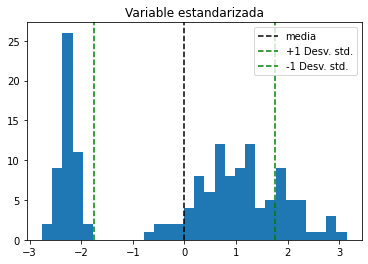

In [43]:
fig, ax = plt.subplots()
ax.set_title('Variable estandarizada')
ax.hist(y_estandarizada, bins=30)
ax.axvline(x=media_estandarizada, c='k', label='media', linestyle='--')
ax.axvline(x=media_estandarizada+desv_std_estandarizada, c='g', label='+1 Desv. std.', linestyle='--')
ax.axvline(x=media_estandarizada-desv_std_estandarizada, c='g', label='-1 Desv. std.', linestyle='--')
ax.legend()

In [44]:
#Reducción

y_estandarizada = y_estandarizada/desv_std
media_estandarizada = np.mean(y_estandarizada)
desv_std_estandarizada = np.std(y_estandarizada)

media_estandarizada, desv_std_estandarizada

(-4.263256414560601e-16, 1.0)

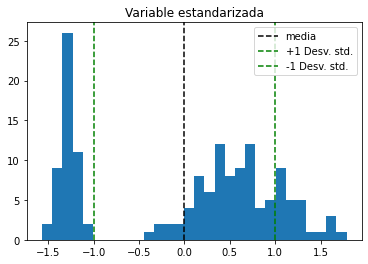

In [45]:
fig, ax = plt.subplots()
ax.set_title('Variable estandarizada')
ax.hist(y_estandarizada, bins=30)
ax.axvline(x=media_estandarizada, c='k', label='media', linestyle='--')
ax.axvline(x=media_estandarizada+desv_std_estandarizada, c='g', label='+1 Desv. std.', linestyle='--')
ax.axvline(x=media_estandarizada-desv_std_estandarizada, c='g', label='-1 Desv. std.', linestyle='--')
ax.legend()

## Covarianza

In [47]:
largo_petalo = df['lar.petalo']
largo_sepalo = df['lar.sepalo']

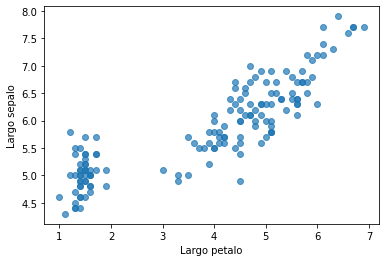

In [51]:
fig, ax = plt.subplots()
ax.scatter(largo_petalo, largo_sepalo, alpha=0.7)
ax.set_xlabel('Largo petalo')
ax.set_ylabel('Largo sepalo')
ax.autoscale()

In [52]:
#Covarianza

covarianza = np.cov(largo_petalo, largo_sepalo)
covarianza

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

# Correlación 

In [55]:
correlacion = df.corr(method='spearman')
correlacion

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [56]:
correlacion = df.corr(method='kendall')
correlacion

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


<AxesSubplot:>

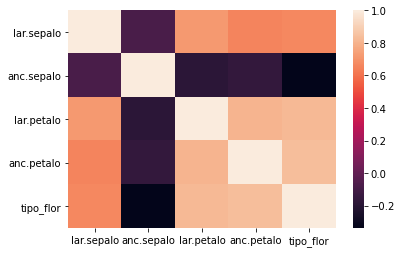

In [57]:
sns.heatmap(correlacion, xticklabels=correlacion.columns)